In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset

In [2]:
df = pd.read_csv("customer_data.csv")
print(df.head())

   Customer_ID  Age  Gender  Annual_Income  Spending_Score  \
0            1   56  Female      110609.88           70.58   
1            2   69  Female       63439.44           96.87   
2            3   46    Male       55007.84           68.80   
3            4   32    Male       84510.34           83.70   
4            5   60  Female       86892.41           86.69   

   Purchase_Frequency Customer_Satisfaction  
0                  19                Medium  
1                   7                Medium  
2                   3                Medium  
3                  15                Medium  
4                  14                Medium  


# Display basic information about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            200 non-null    int64  
 1   Age                    200 non-null    int64  
 2   Gender                 200 non-null    object 
 3   Annual_Income          200 non-null    float64
 4   Spending_Score         200 non-null    float64
 5   Purchase_Frequency     200 non-null    int64  
 6   Customer_Satisfaction  200 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 11.1+ KB


In [4]:
 df.describe()

,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency
count,200.000000,200.00000,200.000000,200.000000,200.000000
mean,100.500000,43.42500,68865.666800,50.232050,9.230000
std,57.879185,14.94191,29259.276933,27.991242,5.457658
min,1.000000,18.00000,20518.490000,0.260000,1.000000
25%,50.750000,31.00000,45019.265000,26.800000,5.000000
50%,100.500000,43.50000,68390.040000,50.495000,8.000000
75%,150.250000,56.00000,91845.615000,74.180000,14.000000
max,200.000000,69.00000,119593.120000,99.580000,19.000000


In [5]:
df.head()

,Customer_ID,Age,Gender,Annual_Income,Spending_Score,Purchase_Frequency,Customer_Satisfaction
0,1,56,Female,110609.88,70.58,19,Medium
1,2,69,Female,63439.44,96.87,7,Medium
2,3,46,Male,55007.84,68.80,3,Medium
3,4,32,Male,84510.34,83.70,15,Medium
4,5,60,Female,86892.41,86.69,14,Medium


# Handling Missing Values

In [6]:
df.fillna(df.mean(numeric_only=True), inplace=True)  # Fill missing numerical values with mean
df.fillna("Unknown", inplace=True)  # Fill missing categorical values with 'Unknown'

# Removing Duplicates

In [7]:
df.drop_duplicates(inplace=True)
print(df)

     Customer_ID  Age  Gender  Annual_Income  Spending_Score  \
0              1   56  Female      110609.88           70.58   
1              2   69  Female       63439.44           96.87   
2              3   46    Male       55007.84           68.80   
3              4   32    Male       84510.34           83.70   
4              5   60  Female       86892.41           86.69   
..           ...  ...     ...            ...             ...   
195          196   69  Female      117424.82           23.61   
196          197   30  Female      119593.12           76.00   
197          198   58    Male       25587.12           53.13   
198          199   20    Male       93703.56           72.05   
199          200   56  Female       74591.58            6.23   

     Purchase_Frequency Customer_Satisfaction  
0                    19                Medium  
1                     7                Medium  
2                     3                Medium  
3                    15                

# Standardizing Numerical Values (Scaling)

In [8]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = (df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std()
print(df)

     Customer_ID       Age  Gender  Annual_Income  Spending_Score  \
0      -1.719098  0.841593  Female       1.426700        0.726940   
1      -1.701821  1.711629  Female      -0.185453        1.666162   
2      -1.684543  0.172334    Male      -0.473622        0.663349   
3      -1.667266 -0.764628    Male       0.534691        1.195658   
4      -1.649989  1.109296  Female       0.616104        1.302477   
..           ...       ...     ...            ...             ...   
195     1.649989  1.711629  Female       1.659616       -0.951085   
196     1.667266 -0.898480  Female       1.733722        0.920572   
197     1.684543  0.975444    Male      -1.479139        0.103531   
198     1.701821 -1.567738    Male       0.848890        0.779456   
199     1.719098  0.841593  Female       0.195696       -1.571993   

     Purchase_Frequency Customer_Satisfaction  
0              1.790145                Medium  
1             -0.408600                Medium  
2             -1.141515    

# Identifying and Treating Outliers using IQR

In [9]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Set visualization style

In [10]:
sns.set_style("whitegrid")

# Create subplots

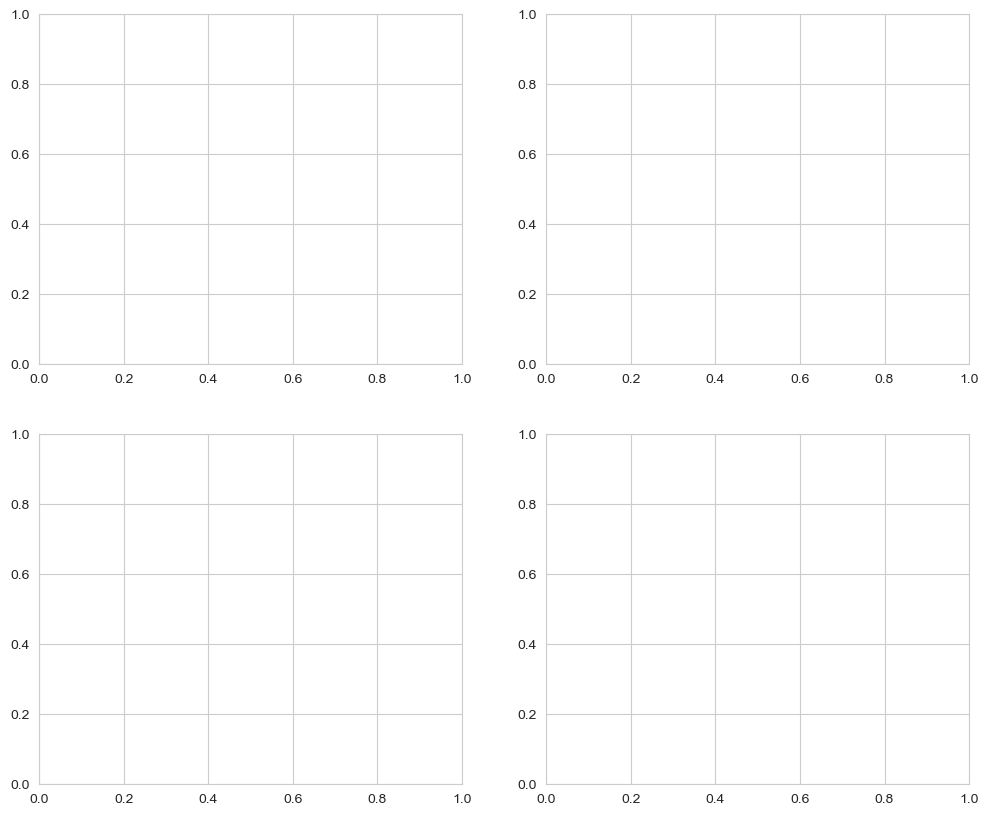

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Create figure

In [12]:
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

# Age distribution

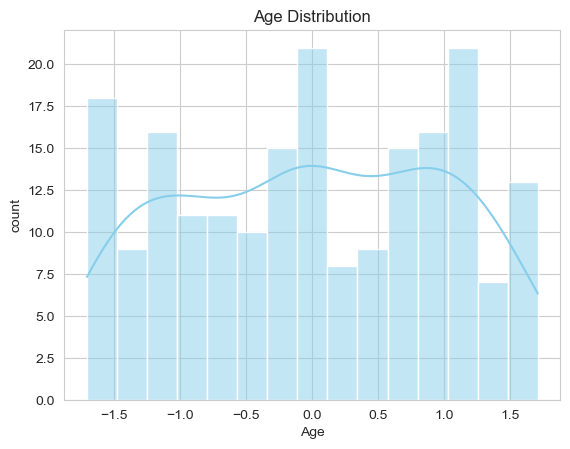

In [13]:
sns.histplot(df["Age"], bins=15, kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title("Age Distribution")
sns.histplot(df["Age"], bins=15, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("count")

# Show the plot
plt.show()

# Income vs Spending Score

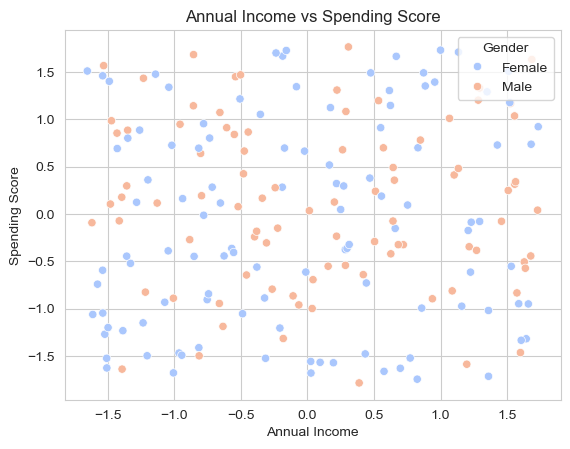

In [14]:
sns.scatterplot(x=df["Annual_Income"], y=df["Spending_Score"], hue=df["Gender"], palette="coolwarm")

plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

# Show the plot
plt.show()

# Purchase Frequency distribution

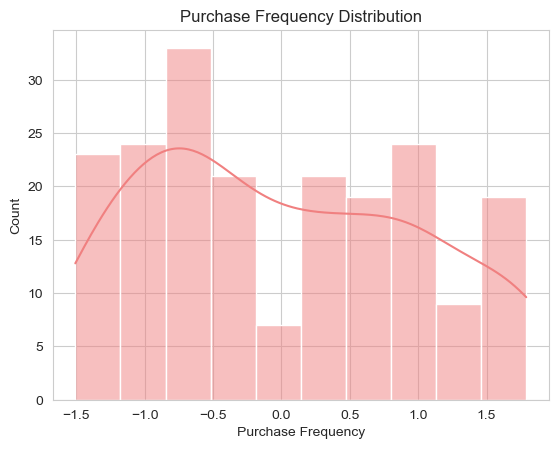

In [15]:
sns.histplot(df["Purchase_Frequency"], bins=10, kde=True, color="lightcoral")

# Set title and labels
plt.title("Purchase Frequency Distribution")
plt.xlabel("Purchase Frequency")
plt.ylabel("Count")

# Show the plot
plt.show()

In [16]:
# Customer Satisfaction distribution

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18744\1960797556.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Customer_Satisfaction"], palette="muted")


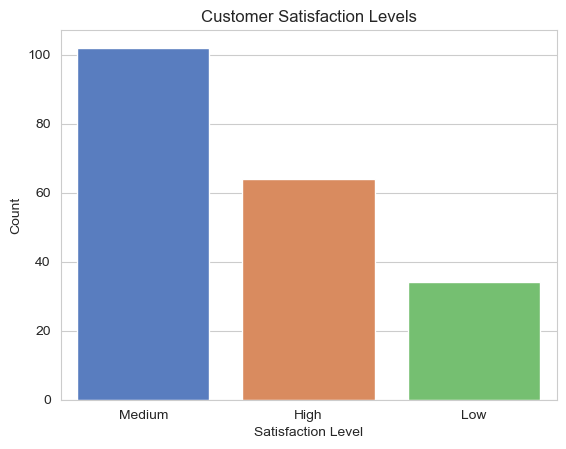

In [17]:
sns.countplot(x=df["Customer_Satisfaction"], palette="muted")

# Set title and labels
plt.title("Customer Satisfaction Levels")
plt.xlabel("Satisfaction Level")
plt.ylabel("Count")

# Show the plot
plt.show()